# 23 - Bayesian vs Frequentist Approaches

Two different philosophies for thinking about probability:

- **Frequentist:** Probability comes only from repeated experiments (count what happened)
- **Bayesian:** Start with a belief, then update it with new evidence (combine prior knowledge + data)

**Key Difference:**
- Frequentist: "What does the data say?"
- Bayesian: "What did I believe before, and how does new data change that?"

**Real-World:** Both approaches are valid and useful in different situations!

## Simple Example: Will It Rain Tomorrow?

You want to predict if it will rain. Let's compare both approaches.

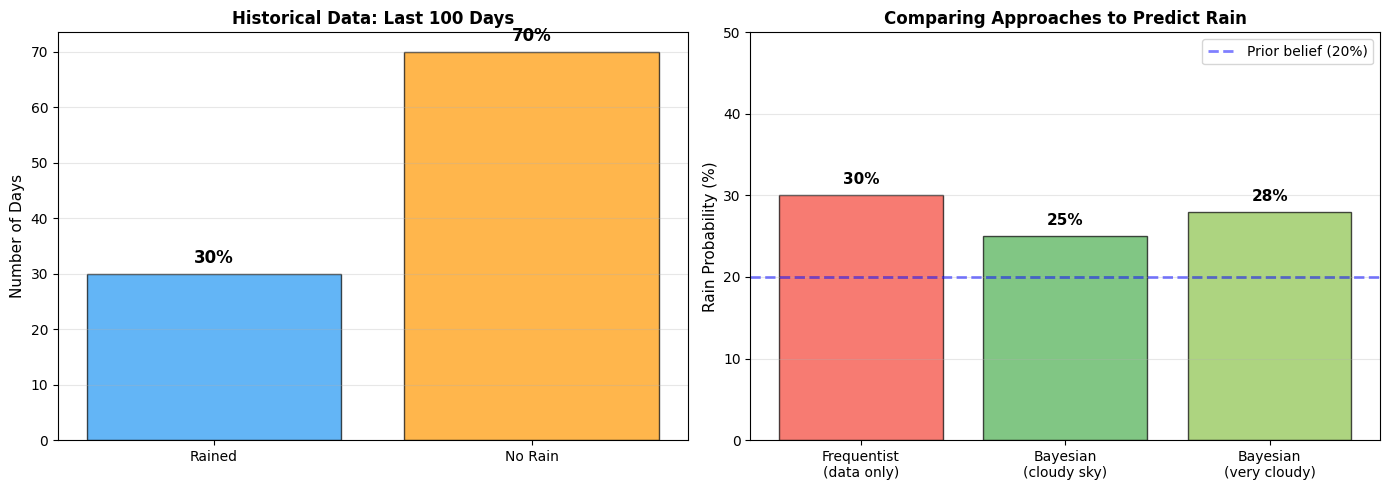


🔍 FREQUENTIST says:
   → Based on 100 days of data: 30% chance of rain
   → Only uses historical data, ignores today's clouds

🧠 BAYESIAN says:
   → Started with prior belief: 20% chance
   → Saw cloudy sky (evidence)
   → Updated to: 25% chance
   → With very cloudy sky: 28% chance
   → Combines past knowledge + current evidence

💡 Key Insight:
   → Frequentist: 'The data says 30%'
   → Bayesian: 'I believed 20%, but clouds suggest higher, so now I think 25-28%'


In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Historical data: Last 100 days
np.random.seed(42)
days_rained = 30  # It rained 30 out of 100 days
days_no_rain = 70

# FREQUENTIST APPROACH
# Only looks at past data
frequentist_prob = days_rained / 100

# BAYESIAN APPROACH
# Starts with prior belief: "Usually rains 20% of time in this season"
prior_belief = 0.20

# New evidence: Sky is cloudy today (clouds increase rain probability)
# Update belief based on evidence
# Simplified Bayesian update: prior + (data - prior) * weight
evidence_weight = 0.5  # How much we trust the new evidence
bayesian_prob = prior_belief + (frequentist_prob - prior_belief) * evidence_weight

# Another scenario: Very cloudy sky (stronger evidence)
strong_evidence_weight = 0.8
bayesian_prob_strong = prior_belief + (frequentist_prob - prior_belief) * strong_evidence_weight

# Visualize the comparison
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Historical data
ax1.bar(['Rained', 'No Rain'], [days_rained, days_no_rain], 
        color=['#2196F3', '#FF9800'], alpha=0.7, edgecolor='black')
ax1.set_ylabel('Number of Days', fontsize=11)
ax1.set_title('Historical Data: Last 100 Days', fontsize=12, fontweight='bold')
ax1.text(0, days_rained + 2, f'{days_rained}%', ha='center', fontsize=12, fontweight='bold')
ax1.text(1, days_no_rain + 2, f'{days_no_rain}%', ha='center', fontsize=12, fontweight='bold')
ax1.grid(axis='y', alpha=0.3)

# Probability estimates
approaches = ['Frequentist\n(data only)', 'Bayesian\n(cloudy sky)', 'Bayesian\n(very cloudy)']
probabilities = [frequentist_prob * 100, bayesian_prob * 100, bayesian_prob_strong * 100]
colors = ['#F44336', '#4CAF50', '#8BC34A']

bars = ax2.bar(approaches, probabilities, color=colors, alpha=0.7, edgecolor='black')
ax2.set_ylabel('Rain Probability (%)', fontsize=11)
ax2.set_title('Comparing Approaches to Predict Rain', fontsize=12, fontweight='bold')
ax2.set_ylim(0, 50)
ax2.axhline(prior_belief * 100, color='blue', linestyle='--', linewidth=2, alpha=0.5, label='Prior belief (20%)')
ax2.grid(axis='y', alpha=0.3)
ax2.legend()

# Add value labels
for bar, val in zip(bars, probabilities):
    height = bar.get_height()
    ax2.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{val:.0f}%',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

print("\n🔍 FREQUENTIST says:")
print(f"   → Based on 100 days of data: {frequentist_prob*100:.0f}% chance of rain")
print(f"   → Only uses historical data, ignores today's clouds")

print("\n🧠 BAYESIAN says:")
print(f"   → Started with prior belief: {prior_belief*100:.0f}% chance")
print(f"   → Saw cloudy sky (evidence)")
print(f"   → Updated to: {bayesian_prob*100:.0f}% chance")
print(f"   → With very cloudy sky: {bayesian_prob_strong*100:.0f}% chance")
print(f"   → Combines past knowledge + current evidence")

print("\n💡 Key Insight:")
print("   → Frequentist: 'The data says 30%'")
print("   → Bayesian: 'I believed 20%, but clouds suggest higher, so now I think 25-28%'")

## Real-World Example: Fraud Detection

Your credit card shows a $500 charge at 3am from an overseas location. Is it fraud?

Let's compare how Frequentist and Bayesian approaches handle this.

🔍 FREQUENTIST APPROACH
Historical data: 100 frauds out of 10000 transactions
Fraud probability: 1.0%

Conclusion: Only 1% of transactions are fraud, so this is probably fine.
⚠️  Problem: Ignores the suspicious 3am overseas pattern!

🧠 BAYESIAN APPROACH
Prior belief (base rate): 1.0% fraud rate

New evidence observed:
  ⏰ 3am transaction → 5.0x more suspicious
  🌍 Overseas location → 3.0x more suspicious
  💰 $500 amount → 2.0x more suspicious

Updated probability: 23.1% chance of fraud

Conclusion: This transaction is highly suspicious! Flag for review.
✅ Advantage: Combines base rate + specific evidence


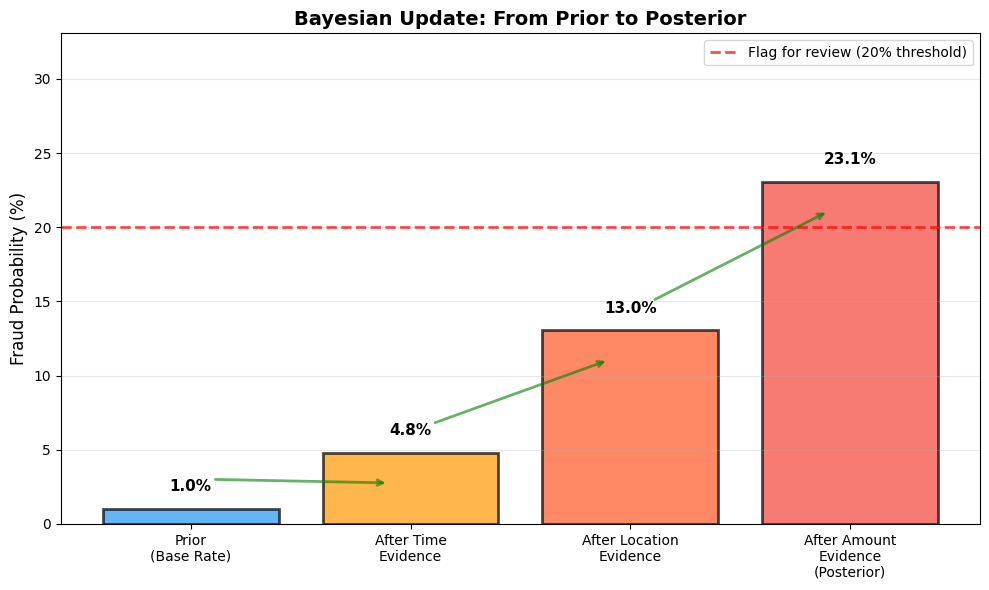


📊 COMPARISON SUMMARY
Frequentist: 1.0% fraud probability
Bayesian: 23.1% fraud probability

Difference: Bayesian is 23.1x higher!

→ Bayesian catches suspicious patterns that pure frequency misses
→ This is why banks use Bayesian methods for fraud detection!


In [2]:
# Scenario: Credit card transaction analysis

# FREQUENTIST APPROACH
# Look only at historical fraud rate
total_transactions = 10000
fraud_transactions = 100  # 1% fraud rate historically
frequentist_fraud_rate = fraud_transactions / total_transactions

print("="*60)
print("🔍 FREQUENTIST APPROACH")
print("="*60)
print(f"Historical data: {fraud_transactions} frauds out of {total_transactions} transactions")
print(f"Fraud probability: {frequentist_fraud_rate*100:.1f}%")
print("\nConclusion: Only 1% of transactions are fraud, so this is probably fine.")
print("⚠️  Problem: Ignores the suspicious 3am overseas pattern!")

# BAYESIAN APPROACH
# Start with prior, update with evidence
prior_fraud_rate = 0.01  # 1% base rate (same as frequentist starting point)

# Evidence factors that increase fraud probability:
# 1. Transaction at 3am (unusual time)
# 2. Overseas location (if customer rarely travels)
# 3. Large amount ($500)

# Simplified Bayesian update
# In reality, this uses Bayes' Theorem with likelihood ratios
time_factor = 5.0      # 3am transactions 5x more likely to be fraud
location_factor = 3.0  # Overseas 3x more likely to be fraud
amount_factor = 2.0    # Large amounts 2x more likely to be fraud

# Update probability (simplified for demonstration)
# P(fraud|evidence) ∝ P(evidence|fraud) * P(fraud)
posterior_odds = prior_fraud_rate * time_factor * location_factor * amount_factor
# Normalize to probability (simplified)
posterior_fraud_prob = posterior_odds / (1 + posterior_odds)

print("\n" + "="*60)
print("🧠 BAYESIAN APPROACH")
print("="*60)
print(f"Prior belief (base rate): {prior_fraud_rate*100:.1f}% fraud rate")
print("\nNew evidence observed:")
print(f"  ⏰ 3am transaction → {time_factor}x more suspicious")
print(f"  🌍 Overseas location → {location_factor}x more suspicious")
print(f"  💰 $500 amount → {amount_factor}x more suspicious")
print(f"\nUpdated probability: {posterior_fraud_prob*100:.1f}% chance of fraud")
print("\nConclusion: This transaction is highly suspicious! Flag for review.")
print("✅ Advantage: Combines base rate + specific evidence")

# Visualize the update process
fig, ax = plt.subplots(figsize=(10, 6))

stages = ['Prior\n(Base Rate)', 'After Time\nEvidence', 'After Location\nEvidence', 'After Amount\nEvidence\n(Posterior)']
probabilities = [
    prior_fraud_rate * 100,
    (prior_fraud_rate * time_factor / (1 + prior_fraud_rate * time_factor)) * 100,
    (prior_fraud_rate * time_factor * location_factor / (1 + prior_fraud_rate * time_factor * location_factor)) * 100,
    posterior_fraud_prob * 100
]

colors = ['#2196F3', '#FF9800', '#FF5722', '#F44336']
bars = ax.bar(stages, probabilities, color=colors, alpha=0.7, edgecolor='black', linewidth=2)

# Add threshold line
ax.axhline(20, color='red', linestyle='--', linewidth=2, label='Flag for review (20% threshold)', alpha=0.7)

ax.set_ylabel('Fraud Probability (%)', fontsize=12)
ax.set_title('Bayesian Update: From Prior to Posterior', fontsize=14, fontweight='bold')
ax.set_ylim(0, max(probabilities) + 10)
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)

# Add value labels
for bar, val in zip(bars, probabilities):
    height = bar.get_height()
    ax.text(bar.get_x() + bar.get_width()/2., height + 1,
            f'{val:.1f}%',
            ha='center', va='bottom', fontweight='bold', fontsize=11)

# Add arrows showing updates
for i in range(len(stages)-1):
    ax.annotate('', xy=(i+0.9, probabilities[i+1]-2), xytext=(i+0.1, probabilities[i]+2),
                arrowprops=dict(arrowstyle='->', lw=2, color='green', alpha=0.6))

plt.tight_layout()
plt.show()

print("\n" + "="*60)
print("📊 COMPARISON SUMMARY")
print("="*60)
print(f"Frequentist: {frequentist_fraud_rate*100:.1f}% fraud probability")
print(f"Bayesian: {posterior_fraud_prob*100:.1f}% fraud probability")
print(f"\nDifference: Bayesian is {posterior_fraud_prob/frequentist_fraud_rate:.1f}x higher!")
print("\n→ Bayesian catches suspicious patterns that pure frequency misses")
print("→ This is why banks use Bayesian methods for fraud detection!")

## When to Use Each Approach

### Frequentist Approach
**Best for:**
- Large datasets with lots of repeated experiments
- When you want objective results based only on data
- Clinical trials, A/B testing, quality control

**Example:** Testing if a new drug works better than placebo

### Bayesian Approach
**Best for:**
- Small datasets where prior knowledge helps
- When you have useful domain expertise to incorporate
- Updating beliefs as new evidence arrives
- Fraud detection, spam filtering, medical diagnosis

**Example:** Diagnosing rare diseases (start with low prior, update with test results)

### Key Philosophical Difference

| Aspect | Frequentist | Bayesian |
|--------|-------------|----------|
| **Probability** | Long-run frequency | Degree of belief |
| **Parameters** | Fixed but unknown | Random variables |
| **Prior knowledge** | Not used | Explicitly incorporated |
| **Updates** | Requires new experiment | Updates with each observation |
| **Interpretation** | "If we repeat this..." | "Given what we know..." |

### Real-World Truth
**Both approaches are valuable!** Modern data science uses both:
- Frequentist methods for controlled experiments and hypothesis testing
- Bayesian methods for predictions, anomaly detection, and updating models

**The best approach depends on your problem, data, and goals.**